In [1]:
import json        ## importing json module

## loading the competitions.json file 
with open('competitions.json') as comp_file:
    comp_data = json.load(comp_file)
    
## if you will see the comp_data you will find
## that the La Liga 2008-09 competition has id number 11
## and the season id is 41
comp = 11
season_id = 1

In [2]:
## load all the matches from this competition
with open('../stats_bomb/matches/' + str(comp) + '/' + str(season_id) + '.json',encoding="utf8") as match_file:
    match_data = json.load(match_file)

## now finding home team and away team
## home team: Real Madrid
## away team: Barcelona
## match id: None(set by default)
home_team = 'Real Madrid'
away_team = 'Barcelona'
match_id = None
score = None

In [3]:
## iterating through each match to find the match_id
for match in match_data:
    home_team_value = (match['home_team']['home_team_name'] == home_team)
    away_team_value = (match['away_team']['away_team_name'] == away_team)
    
    if home_team_value and away_team_value:
        match_id = match['match_id']
        score = str(match['home_score']) + ' : ' + str(match['away_score'])

In [4]:
## checking if the match is found or not
## if found then displaying the right result
if match_id != None:
    print('{} vs {} has match id: {}'.format(home_team, away_team, match_id))
    print('Score: {}'.format(score))
else:
    print('No match found')

Real Madrid vs Barcelona has match id: 9736
Score: 0 : 3


In [5]:
## let's try to find all the results for Barcelona for
## La Liga season 2008-09
for match in match_data:
    home_team_value = match['home_team']['home_team_name'] 
    away_team_value = match['away_team']['away_team_name'] 
    
    if home_team_value == 'Barcelona' or away_team_value == 'Barcelona':
        score = str(match['home_score']) + ' : ' + str(match['away_score'])
        print('{} vs {}, score: {}'.format(home_team_value, away_team_value, score))

Las Palmas vs Barcelona, score: 1 : 1
Barcelona vs Real Betis, score: 2 : 0
Atlético Madrid vs Barcelona, score: 1 : 1
Barcelona vs Leganés, score: 3 : 1
Athletic Bilbao vs Barcelona, score: 0 : 2
Barcelona vs Celta Vigo, score: 2 : 2
Barcelona vs Levante, score: 3 : 0
Leganés vs Barcelona, score: 0 : 3
Eibar vs Barcelona, score: 0 : 2
Villarreal vs Barcelona, score: 0 : 2
Barcelona vs Sevilla, score: 2 : 1
Barcelona vs Málaga, score: 2 : 0
Deportivo La Coruna vs Barcelona, score: 2 : 4
Barcelona vs Girona, score: 6 : 1
Real Betis vs Barcelona, score: 0 : 5
Real Madrid vs Barcelona, score: 0 : 3
Barcelona vs Real Sociedad, score: 1 : 0
Getafe vs Barcelona, score: 1 : 2
Barcelona vs Real Madrid, score: 2 : 2
Barcelona vs Deportivo La Coruna, score: 4 : 0
Barcelona vs Espanyol, score: 5 : 0
Barcelona vs Deportivo Alavés, score: 2 : 1
Deportivo Alavés vs Barcelona, score: 0 : 2
Celta Vigo vs Barcelona, score: 2 : 2
Barcelona vs Valencia, score: 2 : 1
Real Sociedad vs Barcelona, score: 2 :

In [6]:
'''
1. create_boundries -- for creating boundary lines of the pitch.
2. create_center_circle -- for creating center circle.
3. left_penalty_area -- for creating left penalty area.(6-yard box has separate function)
4. right_penalty_area -- for creating right penalty area.(6-yard box has separate function)
5. left_sixyard_box -- for creating six-yard box for left penalty box.
6. right_sixyard_box -- for creating six-yard box for right penalty box.
'''

'\n1. create_boundries -- for creating boundary lines of the pitch.\n2. create_center_circle -- for creating center circle.\n3. left_penalty_area -- for creating left penalty area.(6-yard box has separate function)\n4. right_penalty_area -- for creating right penalty area.(6-yard box has separate function)\n5. left_sixyard_box -- for creating six-yard box for left penalty box.\n6. right_sixyard_box -- for creating six-yard box for right penalty box.\n'

In [7]:
## importing modules

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

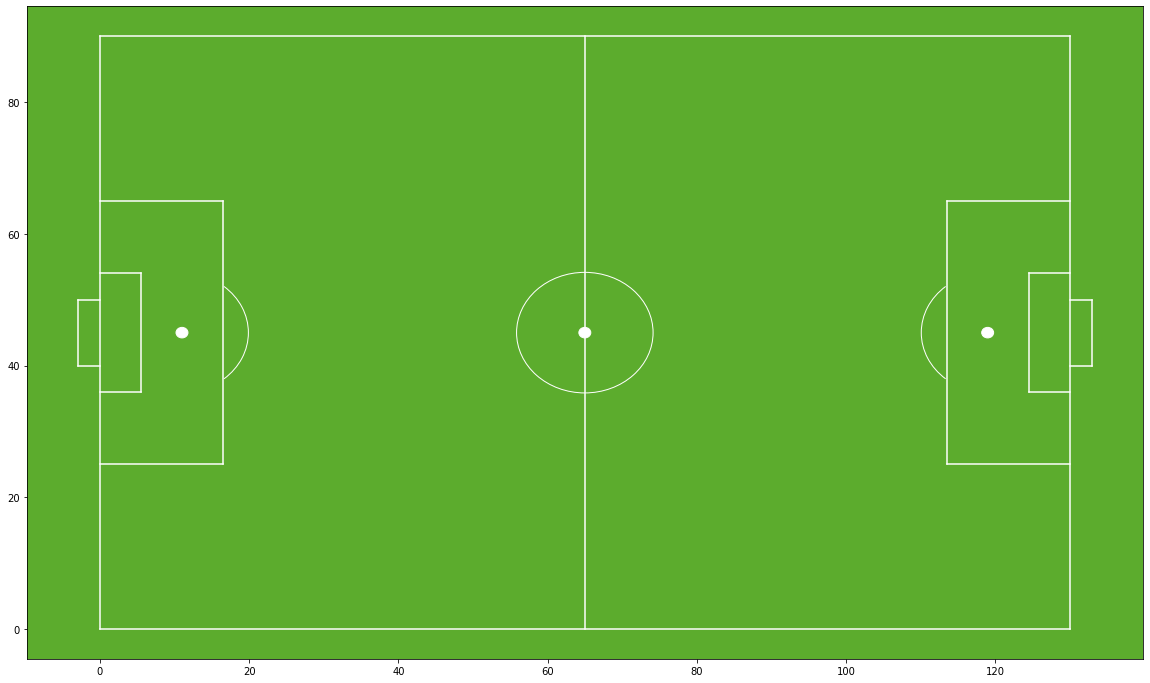

In [8]:

## creating our figure object for our pitchmap
pitch_map = plt.figure(figsize = (20,12))

## adding subplot to the figure
pitch_axis = pitch_map.add_subplot(1,1,1)

def create_boundries():
    '''
    Function will create the boundary line 
    and the middle line of the pitch with 
    the goal-post at either end of the pitch.
    '''
    ## the following lines of code will create the boundaries
    ## and the middle line of the pitchmap
    plt.plot([0,0],[0,90], color='white')
    plt.plot([0,130],[0,0], color='white')
    plt.plot([130,130],[0,90], color='white')
    plt.plot([130,0],[90,90], color='white')
    plt.plot([65,65],[0,90], color='white')

    ## the following lines of code will create 
    ## the goal-post at both side of the pitch
    plt.plot([-3,0], [40,40], color='white')
    plt.plot([-3,0], [50,50], color='white')
    plt.plot([-3,-3], [40,50], color='white')
    plt.plot([133,133], [40,50], color='white')
    plt.plot([130,133], [40,40], color='white')
    plt.plot([130,133], [50,50], color='white')

def create_center_circle():
    '''
    Function will create a circle at the 
    center of the pitchmap, with highlighting 
    the center of the circle.
    '''
    ## making a circle first by defined position
    centreCircle = plt.Circle((65,45), 9.15, color='white', fill=False)
    centreSpot = plt.Circle((65,45), 0.8, color='white')

    ## add the circle to the pitchmap
    pitch_axis.add_patch(centreCircle)
    pitch_axis.add_patch(centreSpot)

def left_penalty_area():
    '''
    Function will create the left penalty
    area of the pitchmap.
    '''
    ## left Penalty Area(without-arc)
    plt.plot([16.5,16.5],[65,25],color='white')
    plt.plot([0,16.5],[65,65],color='white')
    plt.plot([16.5,0],[25,25],color='white')

    ## making the left-arc
    left_arc = Arc((10.75,45), width=18.3, height=18.3, angle=0, theta1=310, theta2=50, color='white')

    ## adding the left arc
    pitch_axis.add_patch(left_arc)

def right_penalty_area():
    '''
    Function will create the right penalty
    area of the pitchmap.
    '''
    ## right Penalty Area(without-arc)
    plt.plot([113.5,130], [65,65], color='white')
    plt.plot([113.5,130], [25,25], color='white')
    plt.plot([113.5, 113.5], [25,65], color='white')

    ## making the right-arc
    right_arc = Arc((119.25,45), width=18.3, height=18.3, angle=180, theta1=310, theta2=50, color='white')

    ## adding the right arc
    pitch_axis.add_patch(right_arc)

def left_sixyard_box():
    '''
    Function will create the left 
    six-yard box and the spot in the penalty box.
    ''' 
    ## the six-yard box
    plt.plot([0,5.5], [54,54], color='white')
    plt.plot([0,5.5], [36,36], color='white')
    plt.plot([5.5,5.5], [54,36], color='white')

    ## creating the penalty-box spot
    penalty_spot = plt.Circle((11,45), radius=0.8, color='white')

    ## adding the spot to the penalty box
    pitch_axis.add_patch(penalty_spot)
    
def right_sixyard_box():
    '''
    Function will create the right 
    six-yard box and the spot in the penalty box.
    ''' 
    ## the six-yard box
    plt.plot([130,124.5], [54,54], color='white')
    plt.plot([130,124.5], [36,36], color='white')
    plt.plot([124.5,124.5], [54,36], color='white')

    ## creating the penalty-box spot
    penalty_spot = plt.Circle((119,45), radius=0.8, color='white')

    ## adding the spot to the penalty box
    pitch_axis.add_patch(penalty_spot)

    
def pitch_color():
    pitch_axis.set_facecolor('xkcd:grass')
    #pitch_axis.set_facecolor((1, 1, 1))

## calling all the functions to create the pitch map.

create_boundries()         
## to create the boundary lines

create_center_circle()      
## to create the center circle

left_penalty_area()
## to create the left-penalty box

right_penalty_area()
## to create the right-penalty box

left_sixyard_box()
## to create the left-penalty six-yard box

right_sixyard_box()
## to create the right-penalty six-yard box

pitch_color()

plt.show()
## to display the plot on the screen

## Slothfulwave612...

In [71]:

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            ## the following lines of code will create 
            ## the goal-post at both side of the pitch
            plt.plot([-3,0], [(width/2)-5,(width/2)-5], color=linecolor)
            plt.plot([-3,0], [(width/2)+5,(width/2)+5], color=linecolor)
            plt.plot([-3,-3], [(width/2)-5,(width/2)+5], color=linecolor)
            plt.plot([length+3,length+3], [(width/2)-5,(width/2)+5], color=linecolor)
            plt.plot([length,length+3], [(width/2)-5,(width/2)-5], color=linecolor)
            plt.plot([length,length+3], [(width/2)+5,(width/2)+5], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

In [70]:
#exec(open("my_pitch_fun.ipynb").read())
!python my_pitch_fun.ipynb

Traceback (most recent call last):
  File "my_pitch_fun.ipynb", line 5, in <module>
    "execution_count": null,
NameError: name 'null' is not defined


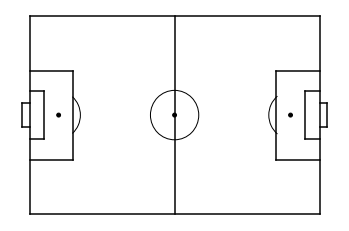

In [72]:
## Note Statsbomb data uses yards for their pitch dimensions

pitch_length_X = 120
pitch_width_Y = 80

## calling the function to create a pitch map
## yards is the unit for measurement and
## gray will be the line color of the pitch map
(fig,ax) = createPitch(pitch_length_X, pitch_width_Y,'yards','black')

In [73]:
## match id for our El Clasico
match_id = 69249
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Lionel Andrés Messi Cuccittini'

In [74]:
## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

In [75]:
## loading the required event data file
##with open('../Statsbomb/data/events/' + file_name) as event_data:
    ##my_data = json.load(event_data, encoding='utf-8')    
my_data = json.load(open('events/' + file_name, 'r', encoding='utf-8'))

In [76]:
## get the nested structure into a dataframe 
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_deflected,block_deflection,foul_committed_offensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_overrun,pass_cut_back,match_id
0,9374d2ce-cc63-469c-afbc-f176255cc903,1,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69249
1,5a6147af-2d23-48a1-82fc-3e811d9d7c9c,2,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69249
2,e84c5573-ce4d-4db0-8b96-b3591a9fc31d,3,1,00:00:00.000,0,0,1,0.0000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69249
3,8520a228-ea88-42d8-bdcf-d958b87ea825,4,1,00:00:00.000,0,0,1,0.0000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69249
4,8d3b2886-8f65-490c-840c-701bcbe05091,5,1,00:00:00.532,0,0,2,0.1399,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69249


In [77]:
## making the list of all column names
column = list(df.columns)


In [78]:
## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

In [79]:
## creating dataframe for dribbles
dribble_df = df.loc[df['type_name'] == 'Dribble'].set_index('index')
dribble_df.dropna(inplace=True, axis=1)
dribble_df = dribble_df.loc[dribble_df['player_name'] == player_name, :]

In [80]:
## iterating through the dribble dataframe we created
for row_num, dribble in dribble_df.iterrows():
    x_loc = dribble['location'][0]
    y_loc = dribble['location'][1]
        
    if dribble['player_name'] == player_name:
        touch_circle = plt.Circle((pitch_length_X - x_loc, y_loc), radius=1.5, color='blue')
            
        if dribble['dribble_outcome_name'] == 'Incomplete':
            ## if incomplete dribble then fade out the circle
            touch_circle.set_alpha(0.3)
        
        ax.add_patch(touch_circle)

In [81]:
## placing text on the plot
plt.text(10, 82, '{}\'s Dribbls vs Real Madrid'.format(player_name), fontsize=12)
plt.text(80, 85, 'Darker Circles: Successful Dribbles', fontsize=12)
plt.text(80, 82, 'Faded Circles: Unsuccessful Dribbles', fontsize=12)

## setting figure and saving it
fig.set_size_inches(12, 8)
fig.savefig('{}\'s Dribbles vs Real Madrid'.format(player_name))

## displaying the plot
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


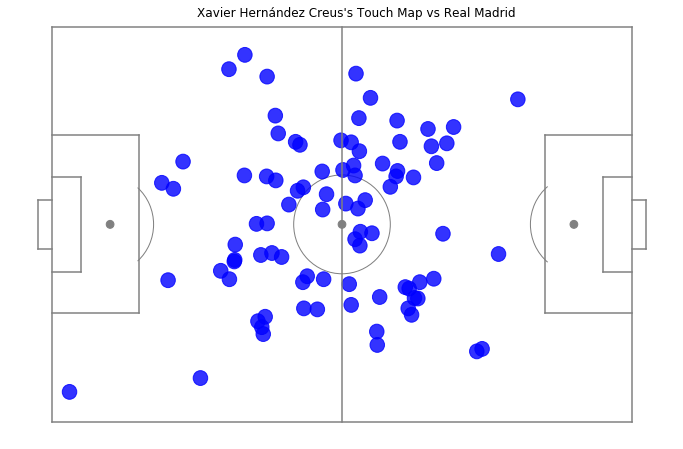

In [83]:
"""
This Python module will help users to create a pitch
map that displays touch map of Barcelona player that 
played in the El Clasico of 2009 where the result 
ended in favour of Barcelona(6:2).
Modules Used(4):
---------------
"""

## Note Statsbomb data uses yards for their pitch dimensions
pitch_length_X = 120
pitch_width_Y = 80

## calling the function to create a pitch map
## yards is the unit for measurement and
## gray will be the line color of the pitch map
(fig,ax) = createPitch(pitch_length_X, pitch_width_Y,'yards','gray')

## match id for our El Clasico
match_id = 69249
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Xavier Hernández Creus'
#player_name = 'Andrés Iniesta Luján'

## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

## loading the required event data file
##with open('../Statsbomb/data/events/' + file_name) as event_data:
    ##my_data = json.load(event_data, encoding='utf-8')    
my_data = json.load(open('events/' + file_name, 'r', encoding='utf-8'))

## get the nested structure into a dataframe 
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

## making the list of all column names
column = list(df.columns)

## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

## creating the dataframe
carry_df = df.loc[df['type_name'] == 'Carry'].set_index('index')
carry_df.dropna(inplace=True, axis=1)
carry_df = carry_df.loc[carry_df['player_name'] == player_name, :]

## iterating through each rows
for row_num, carry in carry_df.iterrows():
    x_loc = carry['location'][0]
    y_loc = carry['location'][1]
        
    if carry['player_name'] == player_name:
        touch_circle = plt.Circle((pitch_length_X - x_loc, y_loc), radius=1.5, color='blue')
            
        touch_circle.set_alpha(alpha=0.8)
        ax.add_patch(touch_circle)

## adding text to the plot        
plt.text(30, 82, '{}\'s Touch Map vs Real Madrid'.format(player_name), fontsize=12)

## editing the figure and saving it
fig.set_size_inches(12, 8)
fig.savefig('{}\'s Touch Map vs Real Madrid'.format(player_name))

## displaying the plot
plt.show()